## Learn EgoClip

Reference
- [EgoVLP Repo](https://github.com/showlab/EgoVLP#egoclip-an-egocentric-video-language-pretraining-dataset)
  - meaning of each column

### Browse EgoClip

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")


In [3]:
egoclip = pd.read_csv('../dataset/ego4d/annotation/egoclip.csv', sep='\t', on_bad_lines='warn')

Skipping line 1439459: expected 11 fields, saw 12
Skipping line 1439460: expected 11 fields, saw 12
Skipping line 1439461: expected 11 fields, saw 12
Skipping line 1439465: expected 11 fields, saw 12



In [4]:
egoclip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847723 entries, 0 to 3847722
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   video_uid         object 
 1   video_dur         float64
 2   narration_source  object 
 3   narration_ind     int64  
 4   narration_time    float64
 5   clip_start        float64
 6   clip_end          float64
 7   clip_text         object 
 8   tag_verb          object 
 9   tag_noun          object 
 10  Unnamed: 10       float64
dtypes: float64(5), int64(1), object(5)
memory usage: 322.9+ MB


In [5]:
egoclip.head()

,video_uid,video_dur,narration_source,narration_ind,narration_time,clip_start,clip_end,clip_text,tag_verb,tag_noun,Unnamed: 10
0,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,0,3.3445,2.967651,3.721266,#C C picks a bag of clothes from the floor,[93],"[192, 115, 12]",NaN
1,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,1,9.5403,9.163501,9.917116,#C C walks out of the bedroom,[108],[],NaN
2,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,2,17.6636,17.286841,18.040456,#C C opens the cabinet door with leg,[51],"[154, 276, 69]",NaN
3,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,3,19.0964,18.719631,19.473246,#C C places the bag of clothes on the floor,[66],"[192, 115, 12]",NaN
4,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,4,22.0735,21.696741,22.450356,#C C opens the washing machine door,[51],"[154, 421, 559]",NaN


In [6]:
# nothing special in the last column
print(egoclip.iloc[:,-1].unique())
# so drop it
egoclip = egoclip.iloc[:,:-1]

[nan]


In [7]:
egoclip.describe()

,video_dur,narration_ind,narration_time,clip_start,clip_end
count,3.847723e+06,3.847723e+06,3.847723e+06,3.847723e+06,3.847723e+06
mean,3.231504e+03,4.203943e+02,1.633884e+03,1.633421e+03,1.634348e+03
std,3.518474e+03,5.984100e+02,2.308789e+03,2.308770e+03,2.308806e+03
min,5.000000e+00,0.000000e+00,-4.630000e-02,0.000000e+00,-1.230473e-02
25%,1.216700e+03,8.400000e+01,3.666283e+02,3.661719e+02,3.670591e+02
50%,1.987933e+03,2.160000e+02,8.992645e+02,8.987788e+02,8.997362e+02
75%,3.767733e+03,4.980000e+02,1.897994e+03,1.897574e+03,1.898485e+03
max,2.541763e+04,7.452000e+03,2.418593e+04,2.418526e+04,2.418661e+04


#### IDK what's narration_ind. 

In [8]:
len(egoclip["narration_ind"].unique())


7403

- It has nothing to do with the "/z/dat/Ego4D/raw/v2/annotations/narration.json"
- the dataloader nevery used it: https://github.com/search?q=repo%3Ashowlab%2FEgoVLP%20narration_ind&type=code
- Also, it does't seem to semantically correlate any other columns (both numeriacal and categorical)

In [9]:
egoclip[egoclip["narration_ind"] == 1]

,video_uid,video_dur,narration_source,narration_ind,narration_time,clip_start,clip_end,clip_text,tag_verb,tag_noun
1,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,1,9.5403,9.163501,9.917116,#C C walks out of the bedroom,[108],[]
30,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_2,1,8.8653,8.417932,9.312645,#C C walks towards the laundry machine,[],[421]
55,00277df3-9107-4592-ba85-b8d054149551,100.466667,narration_pass_1,1,0.6083,0.262194,0.954486,#C C walks around the workshop,[108],[]
94,002ad105-bd9a-4858-953e-54e88dc7587e,1063.233333,narration_pass_1,1,3.4242,2.686269,4.162082,#C C adjusts camera,[0],[73]
181,002ad105-bd9a-4858-953e-54e88dc7587e,1063.233333,narration_pass_2,1,1.3191,0.562209,2.930115,#C C looks around.,[38],[]
...,...,...,...,...,...,...,...,...,...,...
3846344,ffe22125-67ae-4ee1-9f11-2b2df706d1b6,1693.900000,narration_pass_1,1,4.5308,4.319974,4.741686,#C C Looks at the bricks,[38],[55]
3847114,ffe22125-67ae-4ee1-9f11-2b2df706d1b6,1693.900000,narration_pass_2,1,11.7521,11.134736,12.369404,#c c puts on his hat,[66],[240]
3847372,ffefe048-8408-4444-83e6-f05a4adcdcf0,141.400000,narration_pass_1,1,11.4621,10.991506,11.932654,#C C detaches the suction hose from the chop saw,"[18, 38]",[250]
3847447,fff5b8bd-1fc2-457b-9760-7691a7c1d095,1839.700000,narration_pass_1,1,1.6482,0.029938,3.266442,#C adjusts a crochet with her hands,[0],"[321, 138]"


So, let's drop it

In [10]:
egoclip.drop("narration_ind", axis=1, inplace=True)

In [11]:
egoclip

,video_uid,video_dur,narration_source,narration_time,clip_start,clip_end,clip_text,tag_verb,tag_noun
0,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,3.3445,2.967651,3.721266,#C C picks a bag of clothes from the floor,[93],"[192, 115, 12]"
1,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,9.5403,9.163501,9.917116,#C C walks out of the bedroom,[108],[]
2,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,17.6636,17.286841,18.040456,#C C opens the cabinet door with leg,[51],"[154, 276, 69]"
3,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,19.0964,18.719631,19.473246,#C C places the bag of clothes on the floor,[66],"[192, 115, 12]"
4,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,22.0735,21.696741,22.450356,#C C opens the washing machine door,[51],"[154, 421, 559]"
...,...,...,...,...,...,...,...,...,...
3847718,fff5b8bd-1fc2-457b-9760-7691a7c1d095,1839.700000,narration_pass_2,1809.6371,1808.534709,1810.739531,#C C Pulls out a knitting thread from a piece ...,[63],"[115, 500]"
3847719,fff5b8bd-1fc2-457b-9760-7691a7c1d095,1839.700000,narration_pass_2,1811.5815,1810.479129,1812.357440,#C C Coils a knitting thread to a finger,[],"[500, 236]"
3847720,fff5b8bd-1fc2-457b-9760-7691a7c1d095,1839.700000,narration_pass_2,1812.3574,1811.581540,1813.459851,#C C Knits a piece of fabric with a knitting n...,[],"[115, 500]"
3847721,fff5b8bd-1fc2-457b-9760-7691a7c1d095,1839.700000,narration_pass_2,1829.5635,1828.461089,1830.002710,#C C Adjusts a piece of knitted fabric on a lap,[],[115]


#### Clip duration is usefull. Add it as a column

In [12]:
# Clip duration is usefull. Add it as a column
egoclip['clip_duration'] = egoclip['clip_end'] - egoclip['clip_start']
egoclip


,video_uid,video_dur,narration_source,narration_time,clip_start,clip_end,clip_text,tag_verb,tag_noun,clip_duration
0,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,3.3445,2.967651,3.721266,#C C picks a bag of clothes from the floor,[93],"[192, 115, 12]",0.753615
1,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,9.5403,9.163501,9.917116,#C C walks out of the bedroom,[108],[],0.753615
2,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,17.6636,17.286841,18.040456,#C C opens the cabinet door with leg,[51],"[154, 276, 69]",0.753615
3,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,19.0964,18.719631,19.473246,#C C places the bag of clothes on the floor,[66],"[192, 115, 12]",0.753615
4,001e3e4e-2743-47fc-8564-d5efd11f9e90,128.033333,narration_pass_1,22.0735,21.696741,22.450356,#C C opens the washing machine door,[51],"[154, 421, 559]",0.753615
...,...,...,...,...,...,...,...,...,...,...
3847718,fff5b8bd-1fc2-457b-9760-7691a7c1d095,1839.700000,narration_pass_2,1809.6371,1808.534709,1810.739531,#C C Pulls out a knitting thread from a piece ...,[63],"[115, 500]",2.204823
3847719,fff5b8bd-1fc2-457b-9760-7691a7c1d095,1839.700000,narration_pass_2,1811.5815,1810.479129,1812.357440,#C C Coils a knitting thread to a finger,[],"[500, 236]",1.878311
3847720,fff5b8bd-1fc2-457b-9760-7691a7c1d095,1839.700000,narration_pass_2,1812.3574,1811.581540,1813.459851,#C C Knits a piece of fabric with a knitting n...,[],"[115, 500]",1.878311
3847721,fff5b8bd-1fc2-457b-9760-7691a7c1d095,1839.700000,narration_pass_2,1829.5635,1828.461089,1830.002710,#C C Adjusts a piece of knitted fabric on a lap,[],[115],1.541621


narration ratio indicate the clip position in the video as perceptation of video duration

In [13]:
# add clip position (as ratio of total duration) as a column
egoclip['narration_time_ratio'] = egoclip['narration_time'] / (egoclip['video_dur'] + 1e-6)

### show basic statistical feature and visualization

#### overview by columns

As shown below, there are severl observations.
1. video duration is spread out over a large range. E.g., mean is aboud 3231s and standard deviation is about 3518s. However, most (>75%) of them are longer than 1216s while most (>75%) of them are shorter than 3767s. In another word, 1216s to 3767s covers half of the videos.
2. consist with correlation, narration_time, clip_stat, clip_end have very similar obverstation to video duration: wide spread while mainly concentrated around mean value with second quartile a bit lower than mean.
3. clip duration has wide-spreading distribution as well. It has mean of 0.93s with std of 0.84s.
4. narration_time_ratio seems uniformly spliting from 0 to 1 (accoridng to mean, 1st quartile, median, 3rd quartile) indicatig the clips are mostly evenly sampled in a video

In [14]:
egoclip_numerical = egoclip.iloc[:,:][["video_dur", "narration_time", "clip_start", "clip_end", "clip_duration", "narration_time_ratio"]]

In [15]:
egoclip_numerical.describe()

,video_dur,narration_time,clip_start,clip_end,clip_duration,narration_time_ratio
count,3.847723e+06,3.847723e+06,3.847723e+06,3.847723e+06,3.847723e+06,3.847723e+06
mean,3.231504e+03,1.633884e+03,1.633421e+03,1.634348e+03,9.269147e-01,4.977045e-01
std,3.518474e+03,2.308789e+03,2.308770e+03,2.308806e+03,8.385339e-01,2.906161e-01
min,5.000000e+00,-4.630000e-02,0.000000e+00,-1.230473e-02,-1.412159e+00,-1.826732e-03
25%,1.216700e+03,3.666283e+02,3.661719e+02,3.670591e+02,5.135969e-01,2.472042e-01
50%,1.987933e+03,8.992645e+02,8.987788e+02,8.997362e+02,7.256583e-01,4.968597e-01
75%,3.767733e+03,1.897994e+03,1.897574e+03,1.898485e+03,1.080574e+00,7.490112e-01
max,2.541763e+04,2.418593e+04,2.418526e+04,2.418661e+04,6.536563e+01,1.000482e+00


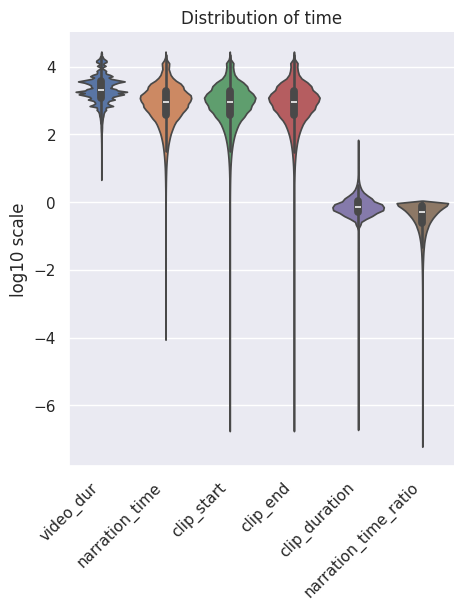

In [16]:
sns.catplot(data=egoclip_numerical.apply(np.log10), 
            kind='violin')
plt.xticks(rotation=45, ha='right')
plt.ylabel('log10 scale')
plt.title('Distribution of time')
plt.show()


#### Correlation among columns

Not suprising, narration_time, clip_start and clip_end are complete correlated. They are strong correlated with video_duration which makes sense as well since longer video duration will have bigger narration_time (the mean time stamp of a clip) and start and end timings. 

The clip duration basically has no correlation with others, which means clip duration could be long or short no matter how long the whole video is or the position (in terms of both ratio or absolut time) in the video where the clip is at

In [16]:
# correlation bettween (numerical) columns
corr_matrix = egoclip.corr(numeric_only=True)
corr_matrix

,video_dur,narration_time,clip_start,clip_end,clip_duration,narration_time_ratio
video_dur,1.000000,0.806401,0.806396,0.806405,0.059668,0.024987
narration_time,0.806401,1.000000,1.000000,1.000000,0.043442,0.419522
clip_start,0.806396,1.000000,1.000000,1.000000,0.043262,0.419524
clip_end,0.806405,1.000000,1.000000,1.000000,0.043625,0.419518
clip_duration,0.059668,0.043442,0.043262,0.043625,1.000000,-0.000965
narration_time_ratio,0.024987,0.419522,0.419524,0.419518,-0.000965,1.000000


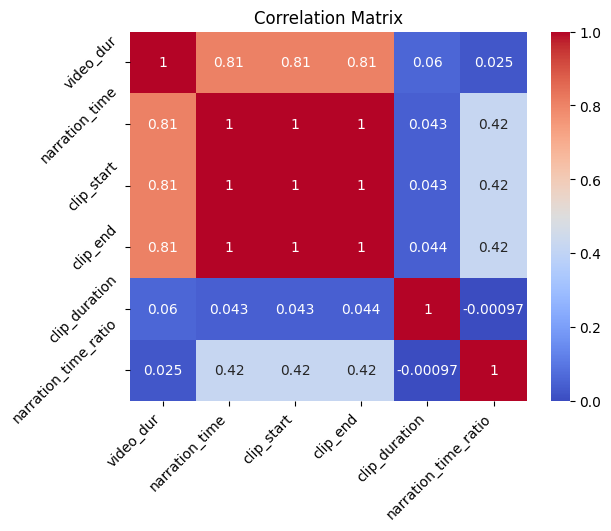

In [17]:
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Tilt the x-axis labels
plt.xticks(rotation=45, ha='right')

# Tilt the y-axis labels
plt.yticks(rotation=45, ha='right')
plt.show()



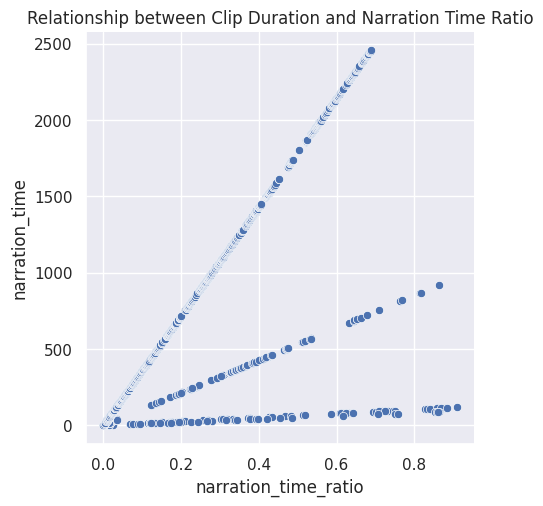

In [22]:
# The relationship between absolute narration time and the ratio of narration time to video duration.

sns.relplot(data=egoclip.iloc[:1000], x='narration_time_ratio', y='narration_time', kind='scatter')
plt.xlabel('narration_time_ratio')
plt.ylabel('narration_time')
plt.title('Relationship between Clip Duration and Narration Time Ratio')
plt.show()


#### By Video
- 7534 long videos in total. Mean duration is 1398s with 1732s std. Half (1st quartile to 3rd quartile) are between 394s ~ 1800s
- Averagly, 510 clips in a video while the std is as high as std. Half of videos (1st quartile to 3rd quartile) have 108 ~ 619 action clips
- the relationship between video duration and clip counts is positive correlation with variance (not pure linear)

In [19]:
goup_by_video_dur = egoclip.groupby('video_uid')
clip_counts = goup_by_video_dur.size()

# Get the video duration for each group
video_duration = goup_by_video_dur['video_dur'].first()

# Combine clip_counts and video_duration into a single dataframe
video_dur_vs_clip_counts = pd.concat([clip_counts, video_duration], axis=1)
video_dur_vs_clip_counts.columns = ['clip_counts', 'video_duration']

# Display the combined dataframe
video_dur_vs_clip_counts


,clip_counts,video_duration
video_uid,,
001e3e4e-2743-47fc-8564-d5efd11f9e90,55,128.033333
00277df3-9107-4592-ba85-b8d054149551,38,100.466667
002ad105-bd9a-4858-953e-54e88dc7587e,143,1063.233333
002d2729-df71-438d-8396-5895b349e8fd,2000,3571.433333
0030b1e9-c6a6-4809-a495-8d45791f9775,32,164.766667
...,...,...
ffda9477-eb8c-40d9-8439-e356a895a24e,1670,2933.400000
ffdb7654-1b86-4cc6-9453-834bbe3361aa,332,599.366667
ffe22125-67ae-4ee1-9f11-2b2df706d1b6,1028,1693.900000


In [20]:
video_dur_vs_clip_counts.describe()

,clip_counts,video_duration
count,7534.000000,7534.000000
mean,510.714494,1398.538315
std,714.188342,1732.688204
min,1.000000,5.000000
25%,108.000000,394.166667
50%,306.000000,985.416667
75%,619.000000,1800.000000
max,9507.000000,25417.633333


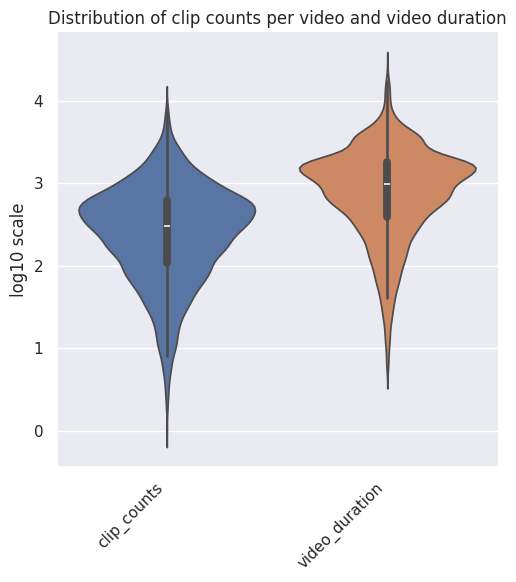

In [24]:
sns.catplot(data=video_dur_vs_clip_counts.apply(np.log10), 
            kind='violin')
plt.xticks(rotation=45, ha='right')
plt.ylabel('log10 scale')
plt.title('Distribution of clip counts per video and video duration')
plt.show()

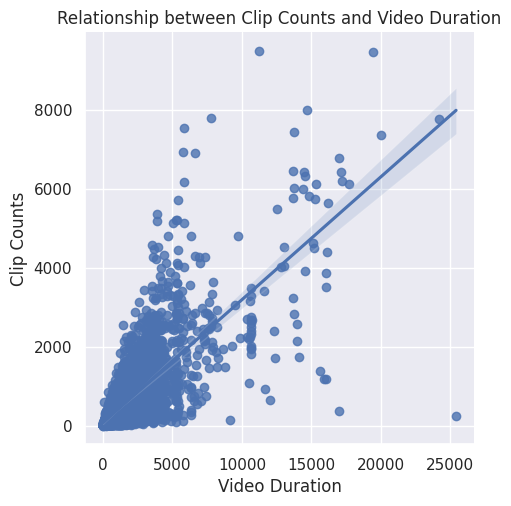

In [22]:
sns.lmplot(data=video_dur_vs_clip_counts, x="video_duration", y="clip_counts", order=1)
plt.xlabel('Video Duration')
plt.ylabel('Clip Counts')
plt.title('Relationship between Clip Counts and Video Duration')
plt.show()
